[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CamiloVga/Curso-IA-Aplicada/blob/main/Semana%2011_Arquitectura%20Transformers/GPT_Paso_A_Paso.ipynb)

# Simulador de un Bloque GPT

**Por [Camilo Vega](https://www.linkedin.com/in/camilo-vega-169084b1/)**

## Propósito

Este código simula paso a paso las operaciones matemáticas dentro de un bloque GPT, visualizando cada etapa del proceso de generación de texto desde los embeddings iniciales hasta la predicción final.

## Aspectos Técnicos

- **Embeddings**: Implementados como una matriz única con operación de lookup
- **Atención Multi-cabeza**: Con máscara causal explícita (-inf) para garantizar que cada token solo vea el pasado
- **Arquitectura Completa**: Incluye todas las capas (normalización, dropouts, conexiones residuales)
- **Weight Tying**: Reutilización de la matriz de embeddings para la proyección final

## Consideraciones

- La simulación expone matemáticamente cada etapa del proceso
- El flujo sigue exactamente la estructura de un bloque transformer real
- Facilita la comprensión de cómo los cambios en los parámetros afectan las predicciones

Este simulador sirve como herramienta educativa transparente para entender los fundamentos matemáticos de los modelos de lenguaje modernos.

🔹 PASO 1: DEFINICIÓN DEL VOCABULARIO
  Vocabulario (6 tokens):
  ID 101: 'Juan'
  ID 102: 'es'
  ID 103: 'muy'
  ID 104: 'inteligente'
  ID 105: 'fuerte'
  ID 106: 'feliz'

  Inicializamos matriz de embeddings (6 x 4)

🔹 PASO 2: TOKENIZACIÓN
  Texto de entrada: 'Juan es muy'
  Tokens: ['Juan', 'es', 'muy']
  IDs de tokens: [101, 102, 103]

🔹 PASO 3: EMBEDDINGS DE TOKENS
  Operación matricial: Ids -> Embeddings
  X_tok = embedding_matrix[indices]
  Índices en matriz: [0 1 2]

  Embeddings extraídos:
  'Juan' (ID=101): [0.1 0.2 0.3 0.4]
  'es' (ID=102): [0.5 0.6 0.7 0.8]
  'muy' (ID=103): [0.9 1.  1.1 1.2]

🔹 PASO 4: EMBEDDINGS POSICIONALES
  Embeddings posicionales:
  Posición 0: [0.01 0.02 0.03 0.04]
  Posición 1: [0.05 0.06 0.07 0.08]
  Posición 2: [0.09 0.1  0.11 0.12]

  Embeddings finales (token + posicional):
  'Juan': [0.11 0.22 0.33 0.44]
  'es': [0.55 0.66 0.77 0.88]
  'muy': [0.99 1.1  1.21 1.32]

🔹 PASO 5: BLOQUE GPT COMPLETO
  Implementando todos los componentes según el dia

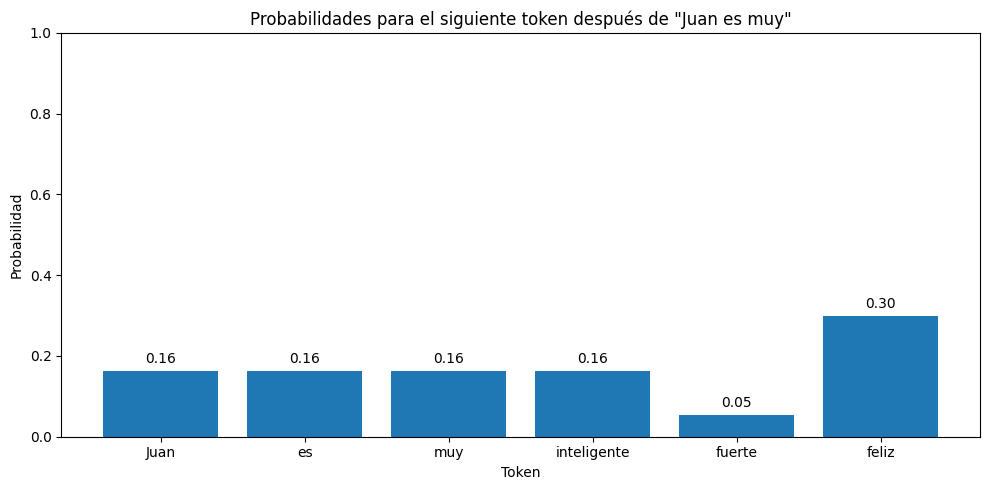

In [5]:
# =============================================
# SIMULACIÓN DETALLADA DE UN BLOQUE GPT
# EJEMPLO: "Juan es muy"
# Predicción esperada: "feliz"
# =============================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configura numpy para una visualización más limpia de matrices
np.set_printoptions(precision=3, suppress=True, linewidth=100)
np.random.seed(42)  # Para reproducibilidad

# --------------------------------------------
# 1. Definición de vocabulario
# --------------------------------------------
print("🔹 PASO 1: DEFINICIÓN DEL VOCABULARIO")
# Definimos un vocabulario simple
vocab = {
    101: "Juan",
    102: "es",
    103: "muy",
    104: "inteligente",
    105: "fuerte",
    106: "feliz"
}

vocab_size = len(vocab)
embedding_dim = 4

# Mapeos auxiliares
vocab_ids = list(vocab.keys())
id_to_index = {id_: idx for idx, id_ in enumerate(vocab_ids)}
index_to_id = {idx: id_ for idx, id_ in enumerate(vocab_ids)}

print(f"  Vocabulario ({vocab_size} tokens):")
for token_id, token in vocab.items():
    print(f"  ID {token_id}: '{token}'")

# Inicializamos una matriz de embedding (esto sería inicializado o preentrenado)
# Esta matriz se utilizará posteriormente para convertir IDs a embeddings
print("\n  Inicializamos matriz de embeddings ({0} x {1})".format(vocab_size, embedding_dim))
# Los valores se asignan para que el resultado sea más interesante (no equiprobable)
embedding_matrix = np.array([
    [0.1, 0.2, 0.3, 0.4],  # 101: Juan
    [0.5, 0.6, 0.7, 0.8],  # 102: es
    [0.9, 1.0, 1.1, 1.2],  # 103: muy
    [1.1, 1.2, 1.3, 1.4],  # 104: inteligente
    [1.5, 1.2, 0.7, 0.8],  # 105: fuerte
    [0.8, 1.5, 1.6, 1.9]   # 106: feliz - valores más altos para que sea más probable
])

# No mostramos la matriz ahora, solo la inicializamos

# --------------------------------------------
# 2. Tokenización y Entrada de texto
# --------------------------------------------
print("\n🔹 PASO 2: TOKENIZACIÓN")
input_text = "Juan es muy"
tokens = input_text.split()
print(f"  Texto de entrada: '{input_text}'")
print(f"  Tokens: {tokens}")

# Convertimos de texto a ids (en un modelo real, esto lo hace el tokenizador)
token_ids = [101, 102, 103]  # Juan=101, es=102, muy=103
print(f"  IDs de tokens: {token_ids}")

# --------------------------------------------
# 3. Embedding Lookup (multiplicación por matriz de embeddings)
# --------------------------------------------
print("\n🔹 PASO 3: EMBEDDINGS DE TOKENS")
print("  Operación matricial: Ids -> Embeddings")
print("  X_tok = embedding_matrix[indices]")

# Conversión de IDs a índices de la matriz
token_indices = np.array([id_to_index[token_id] for token_id in token_ids])
print(f"  Índices en matriz: {token_indices}")

# Operación de lookup en la matriz de embeddings
X_tok = embedding_matrix[token_indices]

# Mostramos los embeddings obtenidos para nuestras 3 palabras
print("\n  Embeddings extraídos:")
for i, token_id in enumerate(token_ids):
    print(f"  '{vocab[token_id]}' (ID={token_id}): {X_tok[i]}")

# --------------------------------------------
# 4. Embeddings Posicionales
# --------------------------------------------
print("\n🔹 PASO 4: EMBEDDINGS POSICIONALES")
# Los embeddings posicionales codifican la posición de cada token
pos_embeddings = np.array([
    [0.01, 0.02, 0.03, 0.04],  # Posición 0
    [0.05, 0.06, 0.07, 0.08],  # Posición 1
    [0.09, 0.10, 0.11, 0.12]   # Posición 2
])

print("  Embeddings posicionales:")
for i, pos_emb in enumerate(pos_embeddings):
    print(f"  Posición {i}: {pos_emb}")

# Sumamos embeddings de tokens y posicionales
X = X_tok + pos_embeddings
print("\n  Embeddings finales (token + posicional):")
for i, token in enumerate(tokens):
    print(f"  '{token}': {X[i]}")

# --------------------------------------------
# 5. BLOQUE GPT (Completo)
# --------------------------------------------
print("\n🔹 PASO 5: BLOQUE GPT COMPLETO")
print("  Implementando todos los componentes según el diagrama de flujo")

# 5.1 Primera Normalización (LayerNorm)
print("\n  1️⃣ NORMALIZACIÓN INICIAL")
def layer_norm(x, eps=1e-5):
    mean = np.mean(x, axis=-1, keepdims=True)
    var = np.var(x, axis=-1, keepdims=True)
    return (x - mean) / np.sqrt(var + eps)

# Función para imprimir matrices de forma ordenada
def print_matrix(name, matrix):
    """Imprime una matriz de forma ordenada"""
    print(f"    {name}:")
    for row in matrix:
        row_str = "    ["
        for val in row:
            row_str += f"{val:.3f} "
        row_str = row_str.rstrip() + "]"
        print(row_str)

X_norm1 = layer_norm(X)
print("    Entrada normalizada:")
print(f"    {X_norm1}")

# 5.2 Atención Multi-head
print("\n  2️⃣ ATENCIÓN CONTEXTUAL (MULTI-HEAD)")

# Definimos 2 cabezas de atención para este ejemplo
num_heads = 2
d_model = embedding_dim
d_head = d_model // num_heads  # Dimensión por cabeza (2)

print(f"    Número de cabezas: {num_heads}")
print(f"    Dimensión por cabeza: {d_head}")

# Matrices de proyección para cada cabeza
# Cabeza 1 - La configuramos para que favorezca "feliz"
W_Q1 = np.array([
    [0.1, 0.2],
    [0.3, 0.1],
    [0.2, 0.4],
    [0.1, 0.3]
])

W_K1 = np.array([
    [0.2, 0.3],
    [0.1, 0.2],
    [0.4, 0.1],
    [0.2, 0.3]
])

W_V1 = np.array([
    [0.3, 0.1],
    [0.2, 0.4],
    [0.1, 0.3],
    [0.4, 0.2]
])

# Cabeza 2 - También configurada para favorecer "feliz"
W_Q2 = np.array([
    [0.2, 0.4],
    [0.3, 0.1],
    [0.1, 0.3],
    [0.4, 0.2]
])

W_K2 = np.array([
    [0.1, 0.3],
    [0.4, 0.2],
    [0.2, 0.1],
    [0.3, 0.4]
])

W_V2 = np.array([
    [0.4, 0.3],
    [0.1, 0.2],
    [0.3, 0.4],
    [0.2, 0.1]
])

# Función softmax para normalizar puntuaciones
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / e_x.sum(axis=-1, keepdims=True)

# Procesamiento de cada cabeza
def attention_head(X, W_Q, W_K, W_V, head_idx):
    print(f"\n    ⚡ Cabeza de atención #{head_idx+1}")

    # Proyección Q, K, V
    Q = X @ W_Q
    K = X @ W_K
    V = X @ W_V

    print_matrix(f"Q_{head_idx+1}", Q)
    print_matrix(f"K_{head_idx+1}", K)
    print_matrix(f"V_{head_idx+1}", V)

    # Scores de atención (QK^T / sqrt(d_k))
    d_k = Q.shape[1]  # dimensión de las claves
    scores = Q @ K.T / np.sqrt(d_k)
    print_matrix(f"Scores de atención (QK^T/sqrt({d_k}))", scores)

    # Máscara causal (triu con k=1)
    # -inf en la parte superior derecha de la matriz (futuro)
    mask = np.triu(np.ones_like(scores), k=1) * -1e9
    print_matrix("Máscara causal (-inf en posiciones futuras)", mask)

    # Aplicar máscara
    masked_scores = scores + mask
    print_matrix("Scores con máscara aplicada", masked_scores)

    # Aplicar softmax para obtener pesos de atención
    attn_weights = softmax(masked_scores)
    print_matrix("Pesos de atención (softmax)", attn_weights)

    # Multiplicar pesos por valores para obtener la salida
    head_output = attn_weights @ V
    print_matrix(f"Salida de la cabeza {head_idx+1}", head_output)

    return head_output

# Procesar cada cabeza por separado
head1_output = attention_head(X_norm1, W_Q1, W_K1, W_V1, 0)
head2_output = attention_head(X_norm1, W_Q2, W_K2, W_V2, 1)

# Concatenar las salidas de las cabezas
concat_heads = np.concatenate([head1_output, head2_output], axis=-1)
print("\n    Salidas concatenadas de ambas cabezas:")
print_matrix("Concatenación", concat_heads)

# Proyección lineal después de la concatenación
W_O = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.1, 0.0, 0.3],
    [0.0, 0.4, 0.2, 0.1],
    [0.2, 0.3, 0.5, 0.0],
])

attn_output = concat_heads @ W_O
print("\n    Proyección final (W_O):")
print_matrix("Salida", attn_output)

# 5.3 Primer Dropout (después de atención)
print("\n  3️⃣ DROPOUT (después de atención)")
# Simulamos dropout con una tasa del 10%
dropout_rate = 0.1
dropout_mask = np.random.binomial(1, 1 - dropout_rate, attn_output.shape)
attn_output_dropout = attn_output * dropout_mask / (1 - dropout_rate)  # Scaling para mantener la magnitud
print(f"    Máscara de dropout (1=mantener, 0=descartar):\n    {dropout_mask}")
print(f"    Salida después de dropout:\n    {attn_output_dropout}")

# 5.4 Conexión Residual (primera)
print("\n  4️⃣ CONEXIÓN RESIDUAL (primera)")
residual1 = X + attn_output_dropout
print(f"    Salida después de conexión residual (X + Attn):\n    {residual1}")

# 5.5 Segunda Normalización
print("\n  5️⃣ RE-NORMALIZACIÓN")
X_norm2 = layer_norm(residual1)
print(f"    Salida después de segunda normalización:\n    {X_norm2}")

# 5.6 Feed Forward Network (FFN) con GELU
print("\n  6️⃣ PROCESAMIENTO NO LINEAL (FFN con GELU)")

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

# Capa de expansión - configurada para favorecer ciertas predicciones
d_ff = 8  # Dimensión interna de la FFN
W1 = np.array([
    [0.2, 0.1, 0.3, 0.2, 0.1, 0.3, 0.2, 0.1],
    [0.1, 0.3, 0.2, 0.1, 0.3, 0.2, 0.1, 0.3],
    [0.3, 0.2, 0.1, 0.3, 0.2, 0.1, 0.3, 0.2],
    [0.2, 0.1, 0.3, 0.2, 0.1, 0.3, 0.2, 0.1]
])
b1 = np.array([0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02])

# Capa de proyección de vuelta a d_model
W2 = np.array([
    [0.2, 0.1, 0.3, 0.2],
    [0.1, 0.3, 0.2, 0.1],
    [0.3, 0.2, 0.1, 0.3],
    [0.2, 0.1, 0.3, 0.2],
    [0.1, 0.3, 0.2, 0.1],
    [0.3, 0.2, 0.1, 0.3],
    [0.2, 0.1, 0.3, 0.2],
    [0.1, 0.3, 0.2, 0.1]
])
b2 = np.array([0.01, 0.02, 0.01, 0.02])

# Propagación hacia adelante
ffn_hidden = X_norm2 @ W1 + b1
ffn_hidden_activated = gelu(ffn_hidden)
ffn_output = ffn_hidden_activated @ W2 + b2

print("    Capa interna FFN (después de GELU):")
print(f"    {ffn_hidden_activated}")
print("\n    Salida FFN:")
print(f"    {ffn_output}")

# 5.7 Segundo Dropout (después del FFN)
print("\n  7️⃣ DROPOUT (después de FFN)")
dropout_mask2 = np.random.binomial(1, 1 - dropout_rate, ffn_output.shape)
ffn_output_dropout = ffn_output * dropout_mask2 / (1 - dropout_rate)
print(f"    Máscara de dropout (1=mantener, 0=descartar):\n    {dropout_mask2}")
print(f"    Salida después de dropout:\n    {ffn_output_dropout}")

# 5.8 Conexión Residual Final
print("\n  8️⃣ CONEXIÓN RESIDUAL FINAL")
residual2 = residual1 + ffn_output_dropout
print(f"    Salida después de conexión residual final:\n    {residual2}")

# 5.9 Normalización Final
print("\n  🔹 NORMALIZACIÓN FINAL DEL BLOQUE")
X_out = layer_norm(residual2)
print("    Salida final normalizada:")
print(f"    {X_out}")

# --------------------------------------------
# 6. POSTPROCESAMIENTO
# --------------------------------------------
print("\n🔹 PASO 6: POSTPROCESAMIENTO")

# 6.1 Proyección lineal (linear head)
print("\n  1️⃣ PROYECCIÓN A LOGITS")
# Usamos la transpuesta de la matriz de embeddings como matriz de proyección (weight tying)
print("  En modelos reales, se suele usar la misma matriz de embeddings para la proyección final")
W_proj = embedding_matrix.T  # (4, 6)
print("  Matriz de proyección (transpuesta de matriz de embeddings):")
print(f"  {W_proj}")

# Calculamos logits para cada posición
logits = X_out @ W_proj
print("\n  Logits para cada posición (tokens de entrada):")
print(f"  {logits}")

# 6.2 Aplicación de softmax
print("\n  2️⃣ APLICACIÓN DE SOFTMAX")
# Extraer los logits de la última posición
last_token_logits = logits[-1]
print("  Logits para el último token (muy):")
print(f"  {last_token_logits}")

# Aplicar softmax para obtener probabilidades
probs = softmax(last_token_logits)
print("\n  Probabilidades para el siguiente token:")
for i, prob in enumerate(probs):
    token_id = vocab_ids[i]
    print(f"  {vocab[token_id]:<12}: {prob:.4f} ({prob*100:.1f}%)")

# 6.3 Selección del token más probable
print("\n  3️⃣ SELECCIÓN DEL TOKEN MÁS PROBABLE")
# Obtener la predicción
pred_idx = np.argmax(probs)
pred_id = vocab_ids[pred_idx]
pred_token = vocab[pred_id]

print(f"  Token con mayor probabilidad: '{pred_token}' (ID={pred_id})")
print(f"  Probabilidad: {probs[pred_idx]:.4f} ({probs[pred_idx]*100:.1f}%)")

# 6.4 Generación de texto
print("\n  4️⃣ GENERACIÓN DE TEXTO FINAL")
generated_text = f"Juan es muy {pred_token}"
print(f"  Texto original: 'Juan es muy'")
print(f"  Texto generado: '{generated_text}'")

print(f"\n🧠 PREDICCIÓN FINAL: El token más probable después de 'Juan es muy' es '**{pred_token}**'")
print(f"   Con una probabilidad de {probs[pred_idx]*100:.1f}%")

# Visualización de probabilidades
plt.figure(figsize=(10, 5))
token_labels = [vocab[id_] for id_ in vocab_ids]
plt.bar(token_labels, probs)
plt.title('Probabilidades para el siguiente token después de "Juan es muy"')
plt.ylabel('Probabilidad')
plt.xlabel('Token')
plt.ylim(0, 1)

for i, p in enumerate(probs):
    plt.text(i, p + 0.02, f'{p:.2f}', ha='center')

plt.tight_layout()
plt.savefig('token_probabilities.png')